# Exercise 3: Multi-Class Classification and Neural Networks

Hand-written digits recognition with (part 1) multi-class logistic regression and (part 2) neural networks. The digits are a subset of the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) by Yann LeCun. This exercise focuses on the logictic regression model for multi-class classification and on the feedforward pass of the neural network for the same dataset.

Files provided by Coursera, located under `../exercises/ex1-ex8-octave/ex3`

- `ex3.m` - Octave/MATLAB script that steps you through part 1
- `ex3_nn.m` - Octave/MATLAB script that steps you through part 2
- `ex3data1.mat` - Training set of hand-written digits
- `ex3weights.mat` - Initial weights for the neural network exercise
- `submit.m` - Submission script that sends your solutions to our servers
- `displayData.m` - Function to help visualize the dataset
- `fmincg.m` - Function minimization routine (similar to `fminunc`)
- `sigmoid.m` - Sigmoid function

Files to complete:

- `lrCostFunction.m` - Logistic regression cost function
- `oneVsAll.m` - Train a one-vs-all multi-class classifier
- `predictOneVsAll.m` - Predict using a one-vs-all multi-class classifier
- `predict.m` - Neural network prediction function

Workflow:

- Download latest Octave version of exercise from Coursera
- Complete code in exercise files following `ex3.pdf`
- Whenever an exercise part is finished
  - Check it with `ex3` or `ex3_nn` in Octave terminal
  - Create a submission token on Coursera (exercise submission page, it lasts 30 minutes)
  - Execute `submit` in Octave terminal
  - Introduce email and token
  - Results appear

**Overview of contents:**

0. Setup: `gnuplot`
1. Part 1: Multi-Class Logistic Regression
    - 1.1 Dataset Loading & Visualization
    - 1.2 Vectorized Logistic Regression: `lrCostFunction.m`
    - 1.3 Regularized & Vectorized Logistic Regression: `lrCostFunction.m`
    - 1.4 One-vs-All Classification: `oneVsAll.m`
    - 1.5 One-vs-All Prediction: `predictOneVsAll.m`
2. Part 2: Neural Networks
    - 2.1 Loading the Data: Pre-Trained Weights2.1 Loading the Data: Pre-Trained Weights
    - 2.2 Feedforward Propagation and Prediction: `predict.m`2.2 Feedforward Propagation and Prediction: `predict.m`


## 0. Setup: `gnuplot`

In [1]:
graphics_toolkit ("gnuplot");

In [2]:
%plot -b inline:gnuplot

## 1. Part 1: Multi-Class Logistic Regression

### 1.1 Dataset Loading & Visualization

In [3]:
% Load saved matrices from file
load('ex3data1.mat');
% The matrices X and y will now be in your Octave environment

In [7]:
% Show variables in workspace
who

Variables visible from the current scope:

X    ans  y



In [9]:
% X: 5000 examples of unrolled 20x20 pixel images containing hand-written digits
% pixels contain grayscale intensities
size(X)

ans =

   5000    400



In [21]:
% y: true label for each example: 1-9, 10:0 (label 10 means digit 0)
size(y)

ans =

   5000      1



In [32]:
% Check min and max values
disp([max(X(1,:)),min(X(1,:))])
disp([max(y(:)),min(y(:))])

   1.047483  -0.057515
   10    1


In [43]:
% Randomly select 100 data points to display
m = size(X, 1);
rand_indices = randperm(m);
num = 10; % num^2 images are visualized in a tiled canvas
sel = X(rand_indices(1:num^2), :);

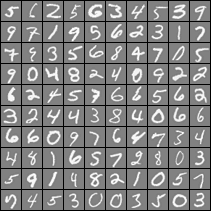

In [44]:
% Function provided in the course
% See how sel is created
% Otherwise, the numer of tiles in the image width can be passed as param (see function)
displayData(sel);

### 1.2 Vectorized Logistic Regression: `lrCostFunction.m`

We need to build 10 separate logistic regression classifiers (each class against the rest).
First, the cost function and its gradient need to be defined in a function.
The main equations to be implemented are the following:

**Cost:**

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)} \log \left( h_\theta\left( x^{(i)} \right) \right) - \left(1 - y^{(i)} \right) \log \left(1 - h_\theta \left( x^{(i)} \right) \right) \right] $$

$$h_\theta(x^{(i)}) = g(\theta^T x^{(i)})$$ $$g(z) = \frac{1}{1+e^{-z}}$$

**Cost, vectorized:**

$$h(X) = [h(x^{(1)}), ..., h(x^{(m)}]^{T} = [g(\theta^{T}x^{(1)}), ..., g(\theta^{T}x^{(m)})]^{T} \in \mathbf{R}^{m \times 1}$$

$$h(X) = g(X \theta)$$

**Gradient, vectorized:**

$$\frac{\partial J }{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( \left( h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_j^{(i)} \right) $$

$$
\begin{align*}
\begin{bmatrix} 
\frac{\partial J}{\partial \theta_0} \\
\frac{\partial J}{\partial \theta_1} \\
\frac{\partial J}{\partial \theta_2} \\
\vdots \\
\frac{\partial J}{\partial \theta_n}
\end{bmatrix} = &
\frac{1}{m} \begin{bmatrix}
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_0^{(i)}\right) \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_1^{(i)}\right) \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_2^{(i)}\right) \\
\vdots \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_n^{(i)}\right) \\
\end{bmatrix} \\
= & \frac{1}{m} \sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x^{(i)}\right) \\
= & \frac{1}{m} X^T \left( h_\theta(X) - Y\right)
\end{align*}$$

$$h(X), Y \in \mathbf{R}^{m \times 1}, X^T \in \mathbf{R}^{n \times m}$$

In [50]:
function g = sig(z)
    g = 1.0 ./ (1.0 + exp(-z));
end

In [51]:
% X -> must be extended with bias x_0 = 1
% y -> one class vs. rest: this must be arranged
function [J, grad] = costFunction(theta, X, y, lambda)
    % Number of training examples
    m = length(y); 
    % Initialize return variables
    J = 0;
    grad = zeros(size(theta));
    % sigmoid(z): g = 1.0 ./ (1.0 + exp(-z));
    z = X*theta; % (m x n) x (n x 1) -> (m x 1)
    h = sig(z); % m x 1
    J = (-1.0/m)*(y'*log(h) + (1.-y)'*log(1.-h));
    e = (h-y); % m x 1
    grad = (1.0/m)*X'*e; % (n x m) x (m x 1) -> (n x 1)
end

### 1.3 Regularized & Vectorized Logistic Regression: `lrCostFunction.m`

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)} \log \left(h_\theta\left(x^{(i)} \right)\right) - \left( 1 - y^{(i)} \right) \log\left(1 - h_\theta \left(x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$



$$
\begin{align*}
& \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)}  & \text{for } j = 0 \\
& \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j & \text{for } j  \ge 1
\end{align*}
$$



In [55]:
% X (m x (n+1)) -> must be extended with bias x_0 = 1
% y (m x 1) -> one class vs. rest: this must be arranged
function [J, grad] = costFunctionReg(theta, X, y, lambda)
    % Number of training examples
    m = length(y); 
    % Number features
    n = size(X,2);     
    % Initialize return variables
    J = 0;
    grad = zeros(size(theta));
    % sigmoid(z): g = 1.0 ./ (1.0 + exp(-z));
    z = X*theta; % (m x n) x (n x 1) -> (m x 1)
    h = sig(z); % m x 1
    J = (-1.0/m)*(y'*log(h) + (1.-y)'*log(1.-h));
    % Cost Regularization
    J = J + (0.5*lambda/m)*theta(2:n)'*theta(2:n)
    % Gradient
    e = (h-y); % m x 1
    grad = (1.0/m)*X'*e; % (n x m) x (m x 1) -> (n x 1)
    % Gradient Regularization
    reg = (lambda/m)*theta;
    reg(1) = 0;
    grad = grad + reg;
end

### 1.4 One-vs-All Classification: `oneVsAll.m`

In [83]:
% A custom optimization function (provided) is used
% Basically one model (i.e., a set of params theta) is fitted for each class: one vs. all
function [all_theta] = fitAll(X, y, num_labels, lambda)
    %   [all_theta] = fitAll(X, y, num_labels, lambda) trains num_labels
    %   logistic regression classifiers and returns each of these classifiers
    %   in a matrix all_theta, where the i-th row of all_theta corresponds 
    %   to the classifier for label i

    % Sizes
    m = size(X, 1);
    n = size(X, 2);

    % Initialization of the return variables
    all_theta = zeros(num_labels, n + 1);

    % Add ones to the X data matrix: bias
    X = [ones(m, 1) X];

    % Hints & notes:
    % - theta(:) column vector.
    % - y == c: vector of 1's and 0's that tell you
    % - use fmincg to optimize the cost in a for loop
    %
    % Example code for fmincg:
    %
    %     % Set Initial theta
    %     initial_theta = zeros(n + 1, 1);
    %     % Set options for fminunc
    %     options = optimset('GradObj', 'on', 'MaxIter', 50);
    %     % Run fmincg to obtain the optimal theta
    %     % This function will return theta and the cost 
    %     [theta, J, iterations] = fmincg(@(t)(costFunctionReg(t, X, (y == c), lambda)), initial_theta, options);

    initial_theta = zeros(n + 1, 1);
    options = optimset('GradObj', 'on', 'MaxIter', 50);
    
    for c = 1:num_labels
        %[theta, J, iterations] = fmincg(@(t)(lrCostFunction(t, X, (y == c), lambda)), initial_theta, options);
        [theta, J, iterations] = fmincg(@(t)(costFunctionReg(t, X, (y == c), lambda)), initial_theta, options);
        %[theta, J, exit_flag] = fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options); = fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);        all_theta(c,:) = theta(:)';
        all_theta(c,:) = theta(:)';
    end

end

In [79]:
num_labels = 10;
lambda = 0.1;

In [ ]:
[all_theta] = fitAll(X, y, num_labels, lambda);

In [81]:
size(all_theta)

ans =

    10   401



In [82]:
all_theta(1,1:10)

ans =

 Columns 1 through 8:

  -3.4761        0        0   0.0001  -0.0009  -0.0010   0.0017  -0.0200

 Columns 9 and 10:

  -0.0017   0.0007



### 1.5 One-vs-All Prediction: `predictOneVsAll.m`

In [162]:
function p = inferOneVsAll(all_theta, X)
    % Sizes
    m = size(X, 1); % X: m x n = examples x pixels/features
    num_labels = size(all_theta, 1); % all_theta: k x (n+1) = classes x (pixels/features + 1)
    % Initalize return variables
    p = zeros(size(X, 1), 1); % m x 
    % Add ones to the X data matrix: bias
    X = [ones(m, 1) X]; % m x (n+1)
    % Apply model
    P = X*all_theta'; % (m x (n+1)) x ((n+1) x k) -> m x k
    P = sig(P);
    [v, p] = max(P,[],2); % maximum column-value (v) and column-index (p) for each row
end

In [163]:
p = inferOneVsAll(all_theta, X);

In [164]:
% Accuracy
a = y == p;
sum(a)/length(a)

ans = 0.9510


## 2. Part 2: Neural Networks

### 2.1 Loading the Data: Pre-Trained Weights

In [120]:
% Load saved matrices from file
load('ex3weights.mat');

In [121]:
who

Variables visible from the current scope:

A              Xp             initial_theta  num_labels     x
I              a              iterations     options        y
J              all_theta      lambda         p
Theta1         ans            m              rand_indices
Theta2         c              n              sel
X              i              num            theta



In [122]:
% The matrices Theta1 and Theta2 will now be in your Octave environment
% Theta1 has size 25 x 401
% Theta2 has size 10 x 26

In [126]:
size(Theta1) # layer 1 -> layer 2

ans =

    25   401



In [127]:
size(Theta2) # layer 2 -> layer 3

ans =

   10   26



### 2.2 Feedforward Propagation and Prediction: `predict.m`

In [155]:
function p = infer(Theta1, Theta2, X)
    % Sizes
    m = size(X, 1);
    num_labels = size(Theta2, 1);
    % Initialize return variable: predictions
    p = zeros(size(X, 1), 1);
    % Layer 1
    a1 = [ones(size(X,1),1), X]; % 5000 x 401
    % Layer 1 -> Layer 2
    z2 = a1*Theta1'; % (5000 x 401) x (401 x 25) -> (5000 x 25)
    a2 = sig(z2);
    a2 = [ones(size(a2,1),1), a2]; % bias -> (5000 x 26)
    % Layer 2 -> Layer 3
    z3 = a2*Theta2'; % (5000 x 26) x (26 x 10) -> (5000 x 10)
    a3 = sig(z3);
    % Select class
    [v, p] = max(a3,[],2); % maximum column-value (v) and column-index (p) for each row
end

In [157]:
p = infer(Theta1, Theta2, X);

In [159]:
% Accuracy
a = y == p;
sum(a)/length(a)

ans = 0.9752
